In [7]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [8]:
model_checkpoint='bert-base-uncased'

In [9]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'rank, alpha':[]}

In [10]:
g = 8
lr = 5.0e-5
wd = 0.0
alphas = [8, 16]
ranks = [8, 16]
lora_dropout = 0.0


for a,r in zip(alphas, ranks):
    print(f'Grid search {model_checkpoint}, learning rate {lr} focal loss, gamma: {g} wd: {wd}, Lora alpha {a}, rank {r}')
    data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                            num_labels=data.num_labels,
                            lora=True,
                            r=r,
                            alpha=a,
                            dropout=lora_dropout)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          gamma=g,
                          early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['rank, alpha'].append(r)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search bert-base-uncased, learning rate 5e-05 focal loss, gamma: 8 wd: 0.0, Lora alpha 8, rank 8


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.1582	Val Loss:	1.0980	Accuracy:	0.3613	F1:	0.3654
2 / 30: Train Loss:	0.1531	Val Loss:	1.0977	Accuracy:	0.3445	F1:	0.3478
3 / 30: Train Loss:	0.1536	Val Loss:	1.0917	Accuracy:	0.3950	F1:	0.3638
4 / 30: Train Loss:	0.1479	Val Loss:	1.0897	Accuracy:	0.4034	F1:	0.3828
5 / 30: Train Loss:	0.1426	Val Loss:	1.0878	Accuracy:	0.3613	F1:	0.3620
6 / 30: Train Loss:	0.1353	Val Loss:	1.0835	Accuracy:	0.4706	F1:	0.4651
7 / 30: Train Loss:	0.1351	Val Loss:	1.0813	Accuracy:	0.4538	F1:	0.4464
8 / 30: Train Loss:	0.1358	Val Loss:	1.0776	Accuracy:	0.4706	F1:	0.4711
9 / 30: Train Loss:	0.1350	Val Loss:	1.0754	Accuracy:	0.5210	F1:	0.5234
10 / 30: Train Loss:	0.1322	Val Loss:	1.0721	Accuracy:	0.5126	F1:	0.5123
11 / 30: Train Loss:	0.1293	Val Loss:	1.0673	Accuracy:	0.5210	F1:	0.5199
12 / 30: Train Loss:	0.1176	Val Loss:	1.0621	Accuracy:	0.5294	F1:	0.5311
13 / 30: Train Loss:	0.1209	Val Loss:	1.0556	Accuracy:	0.5378	F1:	0.5377
14 / 30: Train Loss:	0.1210	Val Loss:	1.0485	Accuracy:	0.546

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.1579	Val Loss:	1.0970	Accuracy:	0.3613	F1:	0.3641
2 / 30: Train Loss:	0.1521	Val Loss:	1.0962	Accuracy:	0.3445	F1:	0.3477
3 / 30: Train Loss:	0.1518	Val Loss:	1.0890	Accuracy:	0.4118	F1:	0.3838
4 / 30: Train Loss:	0.1457	Val Loss:	1.0861	Accuracy:	0.4202	F1:	0.4039
5 / 30: Train Loss:	0.1399	Val Loss:	1.0828	Accuracy:	0.3866	F1:	0.3855
6 / 30: Train Loss:	0.1319	Val Loss:	1.0767	Accuracy:	0.4874	F1:	0.4828
7 / 30: Train Loss:	0.1306	Val Loss:	1.0720	Accuracy:	0.4958	F1:	0.4916
8 / 30: Train Loss:	0.1298	Val Loss:	1.0647	Accuracy:	0.5378	F1:	0.5379
9 / 30: Train Loss:	0.1275	Val Loss:	1.0583	Accuracy:	0.5126	F1:	0.5126
10 / 30: Train Loss:	0.1227	Val Loss:	1.0494	Accuracy:	0.5630	F1:	0.5635
11 / 30: Train Loss:	0.1175	Val Loss:	1.0383	Accuracy:	0.6050	F1:	0.6051
12 / 30: Train Loss:	0.1040	Val Loss:	1.0261	Accuracy:	0.6050	F1:	0.6042
13 / 30: Train Loss:	0.1051	Val Loss:	1.0134	Accuracy:	0.6555	F1:	0.6498
14 / 30: Train Loss:	0.1031	Val Loss:	0.9981	Accuracy:	0.655

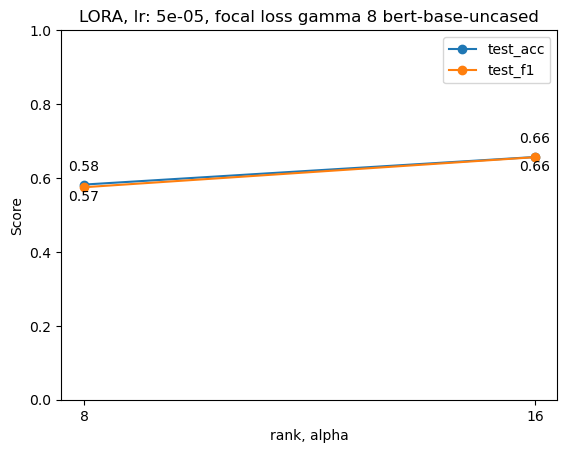

In [11]:
Engine.plot_grid_search(df=results,
                        title=f'LORA, lr: {lr}, focal loss gamma {g} {model_checkpoint}',
                        column='rank, alpha',
                        sci_format=False)

In [12]:
%reset -f